### Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [3]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [4]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+'\n')
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Bit Plane slicing Using Binarization for 8 bit image

In [5]:
def bit_slice_b(a,row,col,n):
    assert n>=0 and n<8, "Invalid bit plane"

    
    b=np.zeros((row,col),np.int64)
    
    for i in range(row):
        for j in range(col):
            temp=np.zeros((9),np.int64)
            pix=a[i,j]
            k=0
            while(k<8):
                temp[k]=pix%2
                pix=pix//2

                b[i,j]=(2**n)*temp[n]
    
                k+=1
    return b

### Main function

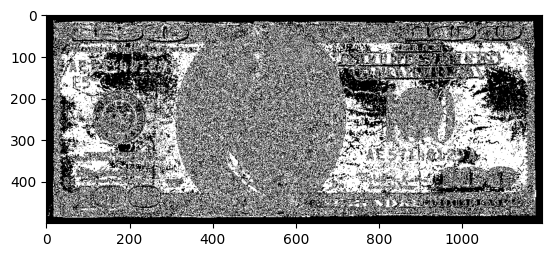

In [11]:
if __name__ == '__main__':
    n=4
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0314(a)(100-dollars).pgm")
    bit_plane=bit_slice_b(k1,row1,col1,n)
    #plt.imshow(bit_plane,cmap='gray')
    Write_img(f"outputs\\bit{n}_img.pgm",bit_plane,g1,c1,rc1,max1,col1,row1)